# Steps to be done

### 1. Having a complete overview of the problem statement
### 2. Importing Required Packages
### 3. Data Preprocessing
### 4. Splitting of Dataset
### 5. Exploratory Data Analysis, i.e, EDA
### 6. Feature Engineering and Feature Selection
### 7. Creating the model, i.e, Modelling and analysing accuracy
### 8. Predicting the value required  and sorting them in buckets

# 2. Importing Required Packages

In [2392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('H2HBABBA1072.csv')

#### Now, I have imported the required python packages and the data set on which I have to work on.
#### I will move ahead to next part, i.e, the data preprocessing.

# 3. Data Preprocessing

In [2393]:
data.shape
original=data.copy()

In [2394]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [2395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

#### Before cleaning the dataset, let's have a go through of what each of the feature means:

#### 1. business_code: Every company has been categorised in to codes like U001, U002, CA02 etc, inidicating the code of the account.

#### 2. cust_number: It's basically a set of random numbers provided to all the customers with accounts.

#### 3. name_customer: Name of the customer

#### 4. clear_date: It indicates the date on which the customer cleared the invoice or made the complete payment.

#### 5. business_year: Year of the clear_date, or simply, the  year in which the transaction took place.

#### 6. doc_id: A random number generated against the document specifying the particular transaction.

#### 7. document_create_date: It indicates the date on which the invoice was generated against the credit.

#### 8. due_in_date: It indicates the date before which the customer is supposed to clear the invoice.

#### 9. invoice_currency: Indicates whether the company's transaction is in USD or CAD.

#### 10. document type: Type of invoice

#### 11. posting_id: Key identifier of the document being an invoice, a credit memo or any other.

#### 12. area_business: Area where the invoice was generated and the transaction took place.

#### 13. total_open_amount: Outstanding amount to be paid by the customer against the invoice.

#### 14. cust_payment_terms: Indicates the business term and the agreement between customer  and their accounts.

#### 15. invoice_id: Unique number generated for indicating every transaction.

#### 16. isOpen: Indicates whether the invoice has been cleared or still pending.

## Data Cleaning

In [2396]:
data.isnull().sum()   # Calculating sum of null values present in each feature

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

### Null Values :-
#### clear_date- 1000, area_business- 50000, invoice_id- 3

### Analysing data

In [2397]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200803720,DEC associates,NaN,2020.0,1.930863e+09,2020-05-06,20200506,20200506,20200524.0,USD,RV,1.0,NaN,61.14,20200501.0,NAM4,1.930863e+09,1
1,U001,0100043936,PAPA JO in,2020-01-30 00:00:00,2020.0,1.930416e+09,2020-01-20,20200120,20200120,20200130.0,USD,RV,1.0,NaN,15026.34,20200120.0,NA10,1.930416e+09,0
2,U001,0200856934,GARDEN co,2019-01-25 00:00:00,2019.0,1.928605e+09,2019-01-21,20190110,20190121,20190205.0,USD,RV,1.0,NaN,10885.20,20190121.0,NAA8,1.928605e+09,0
3,CA02,0140104429,COSTCO,2020-02-03 00:00:00,2020.0,2.960607e+09,2020-01-11,20200111,20200111,20200129.0,CAD,RV,1.0,NaN,68395.74,20200119.0,CA10,2.960607e+09,0
4,U001,0200781803,JRD foundation,2020-03-09 00:00:00,2020.0,1.930534e+09,2020-02-17,20200217,20200217,20200308.0,USD,RV,1.0,NaN,4309.86,20200217.0,NAD1,1.930534e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT,2019-05-03 00:00:00,2019.0,1.928920e+09,2019-03-09,20190307,20190309,20190413.0,USD,RV,1.0,NaN,32623.10,20190309.0,NAG2,1.928920e+09,0
49996,CA02,0140105963,KEYBRA corporation,2019-02-15 00:00:00,2019.0,2.960526e+09,2019-01-29,20190129,20190129,20190210.0,CAD,RV,1.0,NaN,36596.04,20190131.0,CA10,2.960526e+09,0
49997,U001,0200943275,US,2019-04-01 00:00:00,2019.0,1.928957e+09,2019-03-14,20190313,20190314,20190329.0,USD,RV,1.0,NaN,39655.19,20190314.0,NAA8,1.928957e+09,0
49998,U001,0200762301,C&S WH in,2019-10-23 00:00:00,2019.0,1.929976e+09,2019-10-08,20191006,20191008,20191023.0,USD,RV,1.0,NaN,82545.30,20191008.0,NAC6,1.929976e+09,0


In [2398]:
data['posting_id'].value_counts()

1.0    50000
Name: posting_id, dtype: int64

In [2399]:
data['document type'].value_counts()   #since only 3 values are varying, we can drop it as it won't affect the model much

RV    49997
X2        3
Name: document type, dtype: int64

#### 1. Analysing the above data, I saw that the ['area_business'] column contained complete null values.
#### 2. the ['doc_id'] and the ['invoice_id'] were exactly same. So, one of them can be dropped.
#### 3. ['posting_id], ['document_type'] is a constant column.
#### 4. ['documen_create_date'] and ['document_create_date.1'] were duplicate columns and approximately every data in these feature  is similar to ['posting_date']. So, we can take only one of these.


In [2400]:
data.drop(columns=['area_business', 'posting_id', 'document type', 'document_create_date','document_create_date.1', 'doc_id'], axis=1, inplace=True)

In [2401]:
data.isnull().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
posting_date                0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  3
isOpen                      0
dtype: int64

In [2402]:
data          #Now, we are left with 10000 null clear_date and 3 null invoice_id.

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200803720,DEC associates,NaN,2020.0,2020-05-06,20200524.0,USD,61.14,20200501.0,NAM4,1.930863e+09,1
1,U001,0100043936,PAPA JO in,2020-01-30 00:00:00,2020.0,2020-01-20,20200130.0,USD,15026.34,20200120.0,NA10,1.930416e+09,0
2,U001,0200856934,GARDEN co,2019-01-25 00:00:00,2019.0,2019-01-21,20190205.0,USD,10885.20,20190121.0,NAA8,1.928605e+09,0
3,CA02,0140104429,COSTCO,2020-02-03 00:00:00,2020.0,2020-01-11,20200129.0,CAD,68395.74,20200119.0,CA10,2.960607e+09,0
4,U001,0200781803,JRD foundation,2020-03-09 00:00:00,2020.0,2020-02-17,20200308.0,USD,4309.86,20200217.0,NAD1,1.930534e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT,2019-05-03 00:00:00,2019.0,2019-03-09,20190413.0,USD,32623.10,20190309.0,NAG2,1.928920e+09,0
49996,CA02,0140105963,KEYBRA corporation,2019-02-15 00:00:00,2019.0,2019-01-29,20190210.0,CAD,36596.04,20190131.0,CA10,2.960526e+09,0
49997,U001,0200943275,US,2019-04-01 00:00:00,2019.0,2019-03-14,20190329.0,USD,39655.19,20190314.0,NAA8,1.928957e+09,0
49998,U001,0200762301,C&S WH in,2019-10-23 00:00:00,2019.0,2019-10-08,20191023.0,USD,82545.30,20191008.0,NAC6,1.929976e+09,0


#### Since, invoice_id is null, we can assume that it would be case that the user forgot to fill the cell or chose not to fill, case being invoice cleared or anything. Considering it a case of MCAR (Missing Completely At Random), I will drop those rows which have null invoice_id because the count is only 3 and it won't affect the model for prediction of a dataset of 50000.

In [2403]:
data.dropna(subset=['invoice_id'], axis=0, inplace=True)
data.isnull().sum()


business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
posting_date                0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  0
isOpen                      0
dtype: int64

#### Now, we have no null invoice_id. So, we can drop the ['invoice_id'] feature as it is a random number generated against a transaction and is of no use in the prediction part.

In [2404]:
data.drop(['invoice_id'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         49997 non-null  object 
 1   cust_number           49997 non-null  object 
 2   name_customer         49997 non-null  object 
 3   clear_date            39997 non-null  object 
 4   buisness_year         49997 non-null  float64
 5   posting_date          49997 non-null  object 
 6   due_in_date           49997 non-null  float64
 7   invoice_currency      49997 non-null  object 
 8   total_open_amount     49997 non-null  float64
 9   baseline_create_date  49997 non-null  float64
 10  cust_payment_terms    49997 non-null  object 
 11  isOpen                49997 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 5.0+ MB


#### Moving ahead and working on the dates
#### Conversion of all the dates from object into datetime type for the calculation

In [2405]:
data['clear_date']=pd.to_datetime(data['clear_date'], format='%Y%m%d %H:%M:%S')
data['clear_date'].head()

0          NaT
1   2020-01-30
2   2019-01-25
3   2020-02-03
4   2020-03-09
Name: clear_date, dtype: datetime64[ns]

In [2406]:
data['posting_date']=pd.to_datetime(data['posting_date'], format='%Y-%m-%d')
data['due_in_date']=pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')

### Delay= Clear_Date- Due_Date. It basically indicates how sooner or later the invoice was cleared.
#### -ve value indicates the invoice was cleared before the due_date and +ve value indicates the opposite.

In [2407]:
data['delay']=(data['clear_date']-data['due_in_date']).dt.days

#### I decided to sort the data according to posting_date to have a look over about what time period of transactions I am working on.

In [2408]:
data.sort_values(by=['posting_date'], inplace=True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17651,U001,0200769623,WAL-MAR associates,2019-01-17,2019.0,2018-12-30,2019-01-14,USD,31227.25,2018-12-30,NAH4,0,3.0
7313,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,27642.47,2018-12-30,NAH4,0,-4.0
24571,U001,0200744019,TARG corp,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,36285.96,2018-12-30,NAA8,0,8.0
40463,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,205.13,2018-12-30,NAA8,0,1.0
14041,U001,0200705372,FR foundation,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,80755.03,2018-12-30,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34681,U001,0100036318,TFC trust,NaT,2020.0,2020-05-13,2020-05-23,USD,8400.00,2020-05-13,NA10,1,NaN
42464,CA02,0140106408,WAL-M corp,NaT,2020.0,2020-05-14,2020-05-26,CAD,55850.46,2020-05-16,CA10,1,NaN
19142,U001,0200915438,GROC corp,NaT,2020.0,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA8,1,NaN
27483,U001,0100026809,PRES trust,NaT,2020.0,2020-05-19,2020-05-29,USD,201.25,2020-05-19,NA10,1,NaN


#### Cleaning Done... 

## 4. Splitting of Dataset

In [2409]:
from sklearn.model_selection import train_test_split  #importing package required for train,val and test split
main_train=data[data.clear_date.isnull()==False]      #seperated those datasets where the clear_date had no null values
main_test=data[data.clear_date.isnull()].reset_index()  #data set with null clear_dates which we will predict
mt=main_test.copy()
main_train.shape, main_test.shape

((39997, 13), (10000, 14))

#### Instead of taking clear_date as my target column, I chose delay because it will be in the format with which model will work easily.
#### Seperating the target column from the data set.

In [2410]:
Y=main_train['delay']                        
X=main_train.drop(['delay'], axis=1)

#### The main splitting of data into training set, validation set and the testing set is done here.
### I have alloted 70% of the main_train to training set  and the rest 30% is divided equally between val and test.

In [2411]:
X_train, X_inter_test, Y_train, Y_inter_test=train_test_split(X,Y,test_size=0.3, random_state=0, shuffle=False)
X_val, X_test, Y_val, Y_test=train_test_split(X_inter_test,Y_inter_test,test_size=0.5, random_state=0, shuffle=False)
X_train.shape, X_val.shape, X_test.shape

((27997, 12), (6000, 12), (6000, 12))

## 5. Exploratory Data Analysis, i.e., EDA

### Analysis of every feature we are left with

### business_code

<AxesSubplot:xlabel='business_code', ylabel='count'>

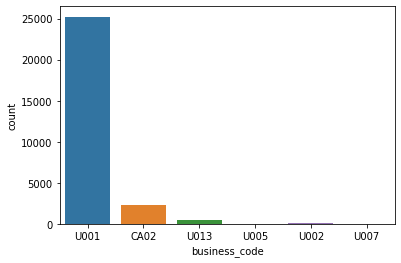

In [2412]:
sns.countplot(x=X_train['business_code'])

#### We can see from the graph that majority of the companies were of U001 category.

### cust_number

In [2413]:
X_train.cust_number.value_counts()

0200769623    5976
0200726979    1066
0200762301     859
0200759878     684
200769623      650
              ... 
200713007        1
0200135060       1
0200760428       1
0200200340       1
200727278        1
Name: cust_number, Length: 1228, dtype: int64

#### This analysis tells that more than one company has same customer number. 

### name_customer

In [2414]:
X_train.name_customer.value_counts()

WAL-MAR co            637
WAL-MAR trust         632
WAL-MAR llc           632
WAL-MAR associates    614
WAL-MAR corp          613
                     ... 
SABA us                 1
ME T us                 1
ROADTOWN trust          1
BIG corporation         1
JAM                     1
Name: name_customer, Length: 3378, dtype: int64

#### Analysing the unique values of customer names, I got to know that many companies have different sub-branches and the transactions from every sub-branch has been given the same cust_number. For e.g.:- WAL-MAR has a total of 5976 transactions broken into it's different sub-companies like WAL-MAR co, WAL-MAR trust, WAL-MAR llc etc. So, we can simply drop this column.

#### Output- Drop

In [2415]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
17651,U001,0200769623,WAL-MAR associates,2019-01-17,2019.0,2018-12-30,2019-01-14,USD,31227.25,2018-12-30,NAH4,0
7313,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,27642.47,2018-12-30,NAH4,0
24571,U001,0200744019,TARG corp,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,36285.96,2018-12-30,NAA8,0
40463,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,205.13,2018-12-30,NAA8,0
14041,U001,0200705372,FR foundation,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,80755.03,2018-12-30,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,U001,0200759082,INGL in,2019-10-22,2019.0,2019-10-07,2019-10-22,USD,24754.02,2019-10-07,NAA8,0
49835,U001,0200762301,C&S WH in,2019-10-22,2019.0,2019-10-07,2019-10-22,USD,172589.64,2019-10-07,NAC6,0
47103,U001,0200759878,SA trust,2019-11-18,2019.0,2019-10-07,2019-11-16,USD,38528.00,2019-10-07,NAWU,0
42338,U001,0200434439,BAUGH SU in,2019-10-23,2019.0,2019-10-07,2019-10-22,USD,50031.99,2019-10-07,NAA8,0


#### Same customer_number for different customer_name 

### Clear_Date

In [2416]:
X_train.clear_date.min(), X_train.clear_date.max()

(Timestamp('2019-01-04 00:00:00'), Timestamp('2019-12-31 00:00:00'))

#### We have a trainset data of around a year.

In [2417]:
months=X_train.clear_date.dt.month
months.value_counts()

5     3254
8     3226
7     3183
4     3120
3     3048
9     3037
6     2840
2     2452
10    2154
1     1350
11     289
12      44
Name: clear_date, dtype: int64

#### This indicates that most of the invoices were cleared in the 5th month of the year. Plotting it on a graph, we get:

<AxesSubplot:xlabel='clear_date', ylabel='count'>

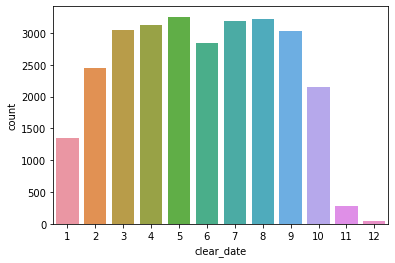

In [2418]:
sns.countplot(x=months)

### BUSINESS_YEAR

In [2419]:
X_train.buisness_year.value_counts()

2019.0    27997
Name: buisness_year, dtype: int64

#### Business_year here became a constant column.
#### Output- Drop

### POSTING_DATE

In [2420]:
X_train['posting_date'].min(), X_train['posting_date'].max()

(Timestamp('2018-12-30 00:00:00'), Timestamp('2019-10-07 00:00:00'))

#### around a time interval of 10 months and 9-10 days

### INVOICE_CURRENCY

In [2421]:
X_train.invoice_currency.value_counts()

USD    25739
CAD     2258
Name: invoice_currency, dtype: int64

#### approximately 91.93% of the transactions were to be paid in US Dollars. Plus, there's not much difference in the amount if we convert USD to CAD for making it a constant column.
#### Output- Drop

### BASELINE_CREATE_DATE

#### Those tuples whose baseline date and posting date are different

In [2422]:
X_train.loc[X_train['posting_date']!=X_train['baseline_create_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
43904,CA02,0140104409,LOB associates,2019-01-11,2019.0,2018-12-30,2019-01-10,CAD,132959.08,2018-12-31,CA10,0
36215,CA02,0140105785,SHOPPE associates,2019-01-18,2019.0,2018-12-30,2019-01-13,CAD,46528.10,2019-01-03,CA10,0
28632,CA02,0140104423,METRO corp,2019-01-15,2019.0,2018-12-31,2019-01-12,CAD,27250.82,2019-01-02,CA10,0
14190,CA02,0140104440,SO in,2019-01-16,2019.0,2018-12-31,2019-01-12,CAD,89597.99,2019-01-02,CA10,0
26705,CA02,0140104409,LOB llc,2019-01-18,2019.0,2018-12-31,2019-01-13,CAD,56301.33,2019-01-03,CA10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47067,CA02,0140104409,LOB corporation,2019-10-15,2019.0,2019-10-05,2019-10-17,CAD,164361.64,2019-10-07,CA10,0
5180,CA02,0140106181,THE trust,2019-12-19,2019.0,2019-10-05,2019-10-18,CAD,18262.96,2019-10-08,CA10,0
47764,CA02,0140105686,SYSC llc,2019-10-28,2019.0,2019-10-05,2019-10-25,CAD,42716.45,2019-10-15,CA10,0
45923,CA02,0100031970,CAPITAL in,2019-10-17,2019.0,2019-10-06,2019-10-21,CAD,3855.95,2019-10-11,CA10,0


#### 3082 transactions had a difference between posting date and baseline create date. Out of which, 2258 transactions were of companies transacting in CAD. Rest of the datasets were not having much fluctuation. So, we can drop this column too.
#### Output- Drop

### IS_OPEN

In [2423]:
X_train.isOpen.value_counts()

0    27997
Name: isOpen, dtype: int64

#### IsOpen also became a constant column here as all the tuples of training data set have their invoices closed.

### DELAY

In [2424]:
Y_train[Y_train<0].count(), Y_train[Y_train>=0].count()

(10035, 17962)

#### This indicates that 10035 companies cleared the invoice before due date and the rest did on or after the due_date with a delay.

### BUSINESS_CODE VS INVOICE_CURRENCY

In [2425]:
X_train.groupby('business_code').invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2258
U001           USD                 25227
U002           USD                    85
U005           USD                    10
U007           USD                     3
U013           USD                   414
Name: invoice_currency, dtype: int64

#### The initial character of business_code tells the invoice_currency. So, Invoice_currency can be dropped.

In [2426]:
X_train.groupby('invoice_currency').business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2258
USD               U001             25227
                  U013               414
                  U002                85
                  U005                10
                  U007                 3
Name: business_code, dtype: int64

#### There exists no such company who is US based and transacting in Canadian Dollars(CAD) or vice versa.

### Total_Open_Amount VS Delay

In [2427]:
basket=[-15,0,15,30,60,300]
d_basket=pd.cut(Y_train,bins=basket)
d_basket.value_counts()

(-15, 0]     15638
(0, 15]      10834
(30, 60]       527
(15, 30]       389
(60, 300]      193
Name: delay, dtype: int64

#### maximum invoices were cleared with the span of time which is prior or after 15days the due_date.

In [2428]:
X_train=pd.concat([X_train,Y_train],axis=1)

In [2429]:
X_train.corr()     #correlation of the training data set X_train. We can se the trend b/w total_open_amount and delay.

,buisness_year,total_open_amount,isOpen,delay
buisness_year,NaN,NaN,NaN,NaN
total_open_amount,NaN,1.000000,NaN,-0.000804
isOpen,NaN,NaN,NaN,NaN
delay,NaN,-0.000804,NaN,1.000000


In [2430]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17651,U001,0200769623,WAL-MAR associates,2019-01-17,2019.0,2018-12-30,2019-01-14,USD,31227.25,2018-12-30,NAH4,0,3.0
7313,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,2018-12-30,2019-01-14,USD,27642.47,2018-12-30,NAH4,0,-4.0
24571,U001,0200744019,TARG corp,2019-01-22,2019.0,2018-12-30,2019-01-14,USD,36285.96,2018-12-30,NAA8,0,8.0
40463,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,205.13,2018-12-30,NAA8,0,1.0
14041,U001,0200705372,FR foundation,2019-01-14,2019.0,2018-12-30,2019-01-14,USD,80755.03,2018-12-30,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,U001,0200759082,INGL in,2019-10-22,2019.0,2019-10-07,2019-10-22,USD,24754.02,2019-10-07,NAA8,0,0.0
49835,U001,0200762301,C&S WH in,2019-10-22,2019.0,2019-10-07,2019-10-22,USD,172589.64,2019-10-07,NAC6,0,0.0
47103,U001,0200759878,SA trust,2019-11-18,2019.0,2019-10-07,2019-11-16,USD,38528.00,2019-10-07,NAWU,0,2.0
42338,U001,0200434439,BAUGH SU in,2019-10-23,2019.0,2019-10-07,2019-10-22,USD,50031.99,2019-10-07,NAA8,0,1.0


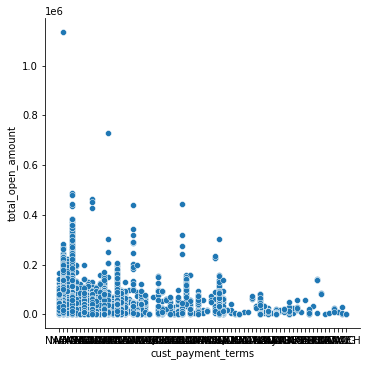

In [2431]:
sns.relplot(x='cust_payment_terms',y='total_open_amount', data=data)

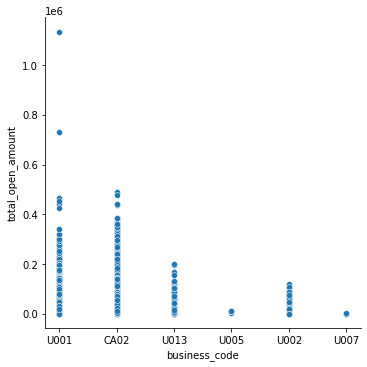

In [2432]:
sns.relplot(x='business_code', y='total_open_amount',data=data)

#### This graph tells that highest transactions were of U001 category and the lowest outstanding amounts were that of U007 category.

<AxesSubplot:xlabel='delay', ylabel='Density'>

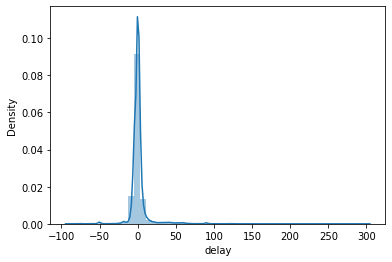

In [2433]:
sns.distplot(X_train['delay'])
#This graph again shows that the density of delay lies between -15 to +15 days (approximate) of due_date.

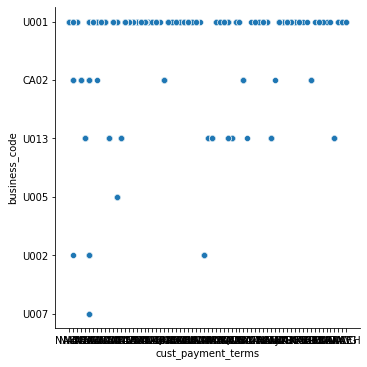

In [2434]:
sns.relplot(x='cust_payment_terms', y='business_code',data=data)

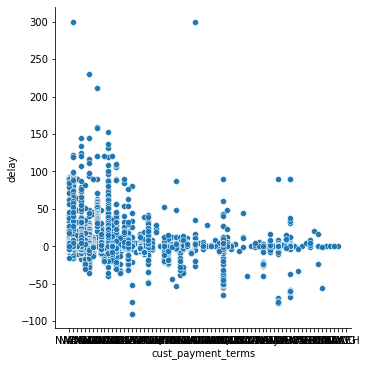

In [2435]:
sns.relplot(x='cust_payment_terms', y='delay',data=data)

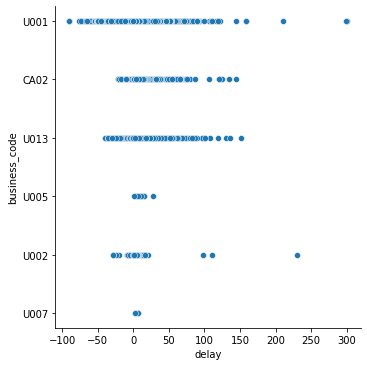

In [2436]:
sns.relplot(x='delay', y='business_code',data=data)

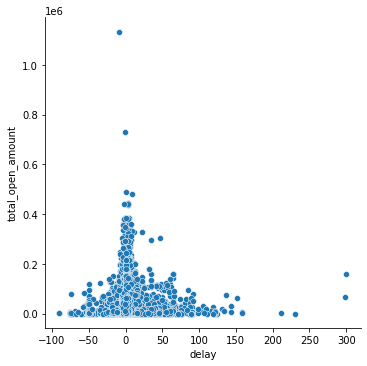

In [2437]:
sns.relplot(x='delay', y='total_open_amount',data=data)

    Total_open_amount <--> 1/delay    correlation-> -ve
    This means that as the delay increases, the total_open_amount decreases. 

## 6.1 Feature Engineering

#### Let's drop all the unnecessary columns in train, val, test and move ahead with the required features for the prediction.

In [2438]:
X_train.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date','isOpen'],inplace=True)
X_val.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date','isOpen'],inplace=True)
X_test.drop(columns=['name_customer','buisness_year','invoice_currency','baseline_create_date','isOpen'],inplace=True)


In [2439]:
X_train.shape, X_val.shape, X_test.shape
X_train

,business_code,cust_number,clear_date,posting_date,due_in_date,total_open_amount,cust_payment_terms,delay
17651,U001,0200769623,2019-01-17,2018-12-30,2019-01-14,31227.25,NAH4,3.0
7313,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,27642.47,NAH4,-4.0
24571,U001,0200744019,2019-01-22,2018-12-30,2019-01-14,36285.96,NAA8,8.0
40463,U001,0200726979,2019-01-15,2018-12-30,2019-01-14,205.13,NAA8,1.0
14041,U001,0200705372,2019-01-14,2018-12-30,2019-01-14,80755.03,NAA8,0.0
...,...,...,...,...,...,...,...,...
1942,U001,0200759082,2019-10-22,2019-10-07,2019-10-22,24754.02,NAA8,0.0
49835,U001,0200762301,2019-10-22,2019-10-07,2019-10-22,172589.64,NAC6,0.0
47103,U001,0200759878,2019-11-18,2019-10-07,2019-11-16,38528.00,NAWU,2.0
42338,U001,0200434439,2019-10-23,2019-10-07,2019-10-22,50031.99,NAA8,1.0


In [2440]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 17651 to 33658
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27997 non-null  object        
 1   cust_number         27997 non-null  object        
 2   clear_date          27997 non-null  datetime64[ns]
 3   posting_date        27997 non-null  datetime64[ns]
 4   due_in_date         27997 non-null  datetime64[ns]
 5   total_open_amount   27997 non-null  float64       
 6   cust_payment_terms  27997 non-null  object        
 7   delay               27997 non-null  float64       
dtypes: datetime64[ns](3), float64(2), object(3)
memory usage: 2.9+ MB


#### We will create different columns for days and months to ease the calculation and the remove the current columns.

#### motive- The more integer datatypes we have, we are closer to creating the model with efficient features.

In [2441]:
X_train['posting_day']=X_train['posting_date'].dt.day
X_train['posting_month']=X_train['posting_date'].dt.month
X_train['due_in_day']=X_train['due_in_date'].dt.day
X_train['due_in_month']=X_train['due_in_date'].dt.month
X_train['cust_no']=X_train['cust_number'].str.extract('(\d+)')    #extracting the integer part of customer  number
X_train.drop(columns=['delay','posting_date','due_in_date','cust_number'],axis=1,inplace=True)

X_val['posting_day']=X_val['posting_date'].dt.day
X_val['posting_month']=X_val['posting_date'].dt.month
X_val['due_in_day']=X_val['due_in_date'].dt.day
X_val['due_in_month']=X_val['due_in_date'].dt.month
X_val['cust_no']=X_val['cust_number'].str.extract('(\d+)')
X_val.drop(columns=['posting_date','due_in_date','cust_number'],axis=1,inplace=True)

X_test['posting_day']=X_test['posting_date'].dt.day
X_test['posting_month']=X_test['posting_date'].dt.month
X_test['due_in_day']=X_test['due_in_date'].dt.day
X_test['due_in_month']=X_test['due_in_date'].dt.month
X_test['cust_no']=X_test['cust_number'].str.extract('(\d+)')
X_test.drop(columns=['posting_date','due_in_date','cust_number'],axis=1,inplace=True)

In [2442]:
X_train

,business_code,clear_date,total_open_amount,cust_payment_terms,posting_day,posting_month,due_in_day,due_in_month,cust_no
17651,U001,2019-01-17,31227.25,NAH4,30,12,14,1,0200769623
7313,U001,2019-01-10,27642.47,NAH4,30,12,14,1,0200769623
24571,U001,2019-01-22,36285.96,NAA8,30,12,14,1,0200744019
40463,U001,2019-01-15,205.13,NAA8,30,12,14,1,0200726979
14041,U001,2019-01-14,80755.03,NAA8,30,12,14,1,0200705372
...,...,...,...,...,...,...,...,...,...
1942,U001,2019-10-22,24754.02,NAA8,7,10,22,10,0200759082
49835,U001,2019-10-22,172589.64,NAC6,7,10,22,10,0200762301
47103,U001,2019-11-18,38528.00,NAWU,7,10,16,11,0200759878
42338,U001,2019-10-23,50031.99,NAA8,7,10,22,10,0200434439


In [2443]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 17651 to 33658
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27997 non-null  object        
 1   clear_date          27997 non-null  datetime64[ns]
 2   total_open_amount   27997 non-null  float64       
 3   cust_payment_terms  27997 non-null  object        
 4   posting_day         27997 non-null  int64         
 5   posting_month       27997 non-null  int64         
 6   due_in_day          27997 non-null  int64         
 7   due_in_month        27997 non-null  int64         
 8   cust_no             27997 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 3.1+ MB


#### We need to convert thr cust_no from object data type to float data type to make it easily understable to machine.

In [2444]:
X_train['cust_no']=X_train['cust_no'].astype(str).astype(float)
X_val['cust_no']=X_val['cust_no'].astype(str).astype(float)
X_test['cust_no']=X_test['cust_no'].astype(str).astype(float)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 17651 to 33658
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27997 non-null  object        
 1   clear_date          27997 non-null  datetime64[ns]
 2   total_open_amount   27997 non-null  float64       
 3   cust_payment_terms  27997 non-null  object        
 4   posting_day         27997 non-null  int64         
 5   posting_month       27997 non-null  int64         
 6   due_in_day          27997 non-null  int64         
 7   due_in_month        27997 non-null  int64         
 8   cust_no             27997 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.1+ MB


#### Since we have business_code as an object type and there are only 6 of them. So, we can apply Label Encoder to convert the feature into int type by allocating every category a specific number. After applying this, every category name will be having a particular number respective to the name making it easy for us to drop the object_column.

In [2445]:
from sklearn.preprocessing import LabelEncoder
B_encoder=LabelEncoder()
B_encoder.fit(X_train['business_code'])
X_train['B_code']=B_encoder.transform(X_train['business_code'])
X_val['B_code']=B_encoder.transform(X_val['business_code'])
X_test['B_code']=B_encoder.transform(X_test['business_code'])
X_train.drop(['business_code'],axis=1, inplace=True)
X_val.drop(['business_code'],axis=1, inplace=True)
X_test.drop(['business_code'],axis=1, inplace=True)

In [2446]:
X_train

,clear_date,total_open_amount,cust_payment_terms,posting_day,posting_month,due_in_day,due_in_month,cust_no,B_code
17651,2019-01-17,31227.25,NAH4,30,12,14,1,200769623.0,1
7313,2019-01-10,27642.47,NAH4,30,12,14,1,200769623.0,1
24571,2019-01-22,36285.96,NAA8,30,12,14,1,200744019.0,1
40463,2019-01-15,205.13,NAA8,30,12,14,1,200726979.0,1
14041,2019-01-14,80755.03,NAA8,30,12,14,1,200705372.0,1
...,...,...,...,...,...,...,...,...,...
1942,2019-10-22,24754.02,NAA8,7,10,22,10,200759082.0,1
49835,2019-10-22,172589.64,NAC6,7,10,22,10,200762301.0,1
47103,2019-11-18,38528.00,NAWU,7,10,16,11,200759878.0,1
42338,2019-10-23,50031.99,NAA8,7,10,22,10,200434439.0,1


In [2447]:
X_train.drop(['cust_payment_terms'],axis=1, inplace=True)
X_val.drop(['cust_payment_terms'],axis=1, inplace=True)
X_test.drop(['cust_payment_terms'],axis=1, inplace=True)
X_train

,clear_date,total_open_amount,posting_day,posting_month,due_in_day,due_in_month,cust_no,B_code
17651,2019-01-17,31227.25,30,12,14,1,200769623.0,1
7313,2019-01-10,27642.47,30,12,14,1,200769623.0,1
24571,2019-01-22,36285.96,30,12,14,1,200744019.0,1
40463,2019-01-15,205.13,30,12,14,1,200726979.0,1
14041,2019-01-14,80755.03,30,12,14,1,200705372.0,1
...,...,...,...,...,...,...,...,...
1942,2019-10-22,24754.02,7,10,22,10,200759082.0,1
49835,2019-10-22,172589.64,7,10,22,10,200762301.0,1
47103,2019-11-18,38528.00,7,10,16,11,200759878.0,1
42338,2019-10-23,50031.99,7,10,22,10,200434439.0,1


## 6.2 Feature Selection

### Our main criterias while feature selection should be:
###  1. int or float datatype
###  2. should be useful in the prediction
###  3. shouldn't be a high level or complex featur

In [2448]:
X_train.shape, X_val.shape, X_test.shape

((27997, 8), (6000, 8), (6000, 8))

In [2449]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 17651 to 33658
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   clear_date         27997 non-null  datetime64[ns]
 1   total_open_amount  27997 non-null  float64       
 2   posting_day        27997 non-null  int64         
 3   posting_month      27997 non-null  int64         
 4   due_in_day         27997 non-null  int64         
 5   due_in_month       27997 non-null  int64         
 6   cust_no            27997 non-null  float64       
 7   B_code             27997 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4)
memory usage: 2.8 MB


In [2450]:
X_train.drop(['clear_date'],axis=1,inplace=True)  #dropped the clear_date to check the correlation on heat map 
X_test.drop(['clear_date'],axis=1,inplace=True)
X_val.drop(['clear_date'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 17651 to 33658
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  27997 non-null  float64
 1   posting_day        27997 non-null  int64  
 2   posting_month      27997 non-null  int64  
 3   due_in_day         27997 non-null  int64  
 4   due_in_month       27997 non-null  int64  
 5   cust_no            27997 non-null  float64
 6   B_code             27997 non-null  int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 2.6 MB


<AxesSubplot:>

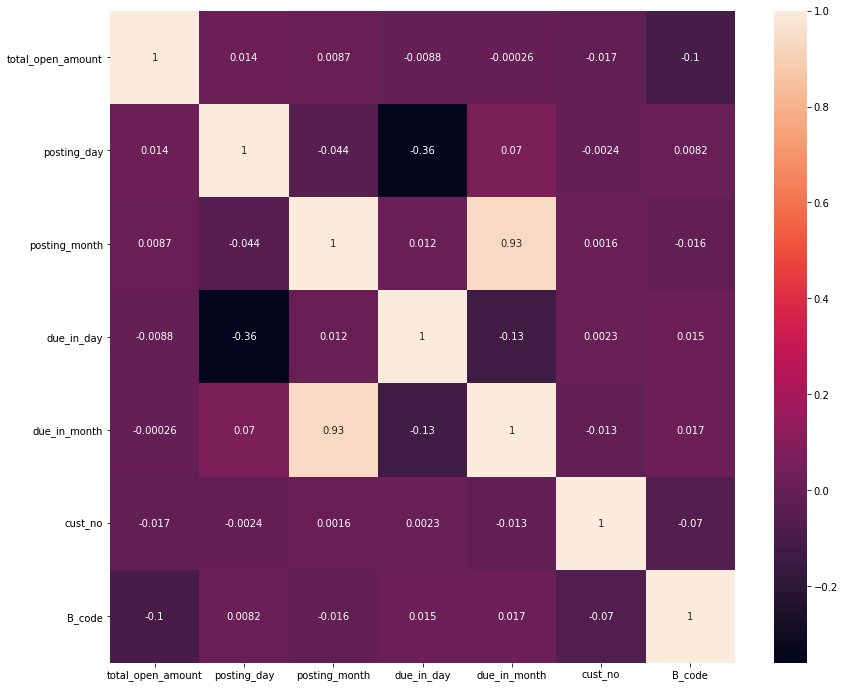

In [2451]:
X_train.info()
plt.figure(figsize=(14,12))
cor=X_train.corr()
sns.heatmap(cor,annot=True)

#### From the above heatmap, we can see that the due_in_month and the posting_month are highly correlated raising a negative impact on our model. So, I will drop the due_in_month.

In [2452]:
X_train=X_train.drop(['due_in_month'],axis=1).copy()
X_val=X_val.drop(['due_in_month'],axis=1).copy()
X_test=X_test.drop(['due_in_month'],axis=1).copy()

In [2453]:
# we can use a variance threshold since all of our features are either of int or float type
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(0.8)
var.fit(X_train)

VarianceThreshold(threshold=0.8)

In [2454]:
var.variances_

array([1.57040519e+09, 7.80290539e+01, 7.04410432e+00, 7.56124619e+01,
       1.87048289e+15, 3.22373610e-01])

## 7. Modelling

#### I will try different model on my validation set and then will come to the conclusion which model is a better selector for my data.

### Linear Regression

In [2455]:
from sklearn.linear_model import LinearRegression
initial_model=LinearRegression()
initial_model.fit(X_train, Y_train)
Y_predict=initial_model.predict(X_val)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_val, Y_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_val, Y_predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_val, Y_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_val, Y_predict), 2)) 
print("R2 score =", round(sm.r2_score(Y_val, Y_predict), 2))
print("Accuracy= ", initial_model.score(X_val,Y_val))

Mean absolute error = 4.09
Mean squared error = 48.44
Median absolute error = 2.56
Explain variance score = 0.09
R2 score = 0.08
Accuracy=  0.08471114678152625


### RandomForest

In [2456]:
from sklearn.ensemble import RandomForestRegressor
initial_model2=RandomForestRegressor()
initial_model2.fit(X_train, Y_train)
Y_predict1=initial_model2.predict(X_val)
print("Mean absolute error =", round(sm.mean_absolute_error(Y_val, Y_predict1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_val, Y_predict1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_val, Y_predict1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_val, Y_predict1), 2)) 
print("R2 score =", round(sm.r2_score(Y_val, Y_predict1), 2))
print("Accuracy= ", initial_model2.score(X_val,Y_val))


Mean absolute error = 3.54
Mean squared error = 43.36
Median absolute error = 1.93
Explain variance score = 0.2
R2 score = 0.18
Accuracy=  0.1806988002845984


### DecisionTree 

In [2457]:
from sklearn.tree import DecisionTreeRegressor
initial_model3 = DecisionTreeRegressor()
initial_model3.fit(X_train, Y_train)
Y_predict1=initial_model3.predict(X_val)
print("Mean absolute error =", round(sm.mean_absolute_error(Y_val, Y_predict1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_val, Y_predict1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_val, Y_predict1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_val, Y_predict1), 2)) 
print("R2 score =", round(sm.r2_score(Y_val, Y_predict1), 2))
print("Accuracy= ", initial_model3.score(X_val,Y_val))

Mean absolute error = 4.57
Mean squared error = 105.34
Median absolute error = 2.0
Explain variance score = -0.97
R2 score = -0.99
Accuracy=  -0.9903812370464522


## 8. Prediction

#### After applying these 3 models to my data, I decided to go with RandomForest Model as it had the best accuracy with a postive R2 score and lesser error.

In [474]:
predicted_delay=initial_model2.predict(X_test)
predicted_delay=np.around(predicted_delay)
predicted_delay.astype(int)

array([  9,  -1,   1, ...,  -3, -11,   1])

In [2459]:
len(predicted_delay)   #all the values of testing set are predicted and now we will create a dataframe for our output.

6000

In [2460]:
new=pd.DataFrame()  #creation of dataframe

In [2461]:
Delay=[]                                          
for i in predicted_delay:
    Delay.append(pd.Timedelta(days=i))
new['Delay']=Delay                             #putting values from predicted_delay(array) to the delay column of new df
new

,Delay
0,5 days
1,-2 days
2,1 days
3,2 days
4,2 days
...,...
5995,-1 days
5996,1 days
5997,-3 days
5998,-10 days


In [2462]:
new['Clear_Date']=mt['due_in_date']+new['Delay']  #creating another column to predict the null clear_dates
new

,Delay,Clear_Date
0,5 days,2020-03-18
1,-2 days,2020-03-11
2,1 days,2020-03-14
3,2 days,2020-03-15
4,2 days,2020-03-15
...,...,...
5995,-1 days,2020-04-15
5996,1 days,2020-04-22
5997,-3 days,2020-04-24
5998,-10 days,2020-04-11


In [2463]:
bucket=[]            #creating buckets to divide the delay into categories
for i in predicted_delay:
    if i<=15:
        bucket.append("0-15 days")
    elif i<=30:
        bucket.append("16-30 days")
    elif i<=45:
        bucket.append("31-45 days")
    elif i<=60:
        bucket.append("46-60 days")
    else:
        bucket.append("Greater than 60 days")
        
new['bucket']=bucket                     #attaching bucket to new dataframe
new.drop(['Delay'],axis=1,inplace=True)    #removing the delay column
new

,Clear_Date,bucket
0,2020-03-18,0-15 days
1,2020-03-11,0-15 days
2,2020-03-14,0-15 days
3,2020-03-15,0-15 days
4,2020-03-15,0-15 days
...,...,...
5995,2020-04-15,0-15 days
5996,2020-04-22,0-15 days
5997,2020-04-24,0-15 days
5998,2020-04-11,0-15 days


In [2464]:
new['bucket'].value_counts()          #counting the number of ocuurence in each bucket

0-15 days               5799
16-30 days                90
31-45 days                61
46-60 days                39
Greater than 60 days      11
Name: bucket, dtype: int64